# Mini Projet - G11
### Dataset: Online Shoppers Purchasing Intention

### Table Contents
- [1. Importing Packages](#1-importing-packages)
- [2. Data Visualization](#2-data-visualization)
- [3. Data Analysis](#3-data-analysis)
    - [3.1 Numerical Attributes](#31-numerical-attributes)
    - [3.2 Categorical Attributes](#32-categorical-attributes)
    - [3.3 Boolean Attributes](#33-boolean-attributes)
    - [3.4 Correlation Analysis](#34-correlation-analysis)
- [4. Data Cleaning](#4-data-cleaning)
    - [4.1 Duplicate and Irrelevant Data](#41-duplicate-and-irrelevant-data)
    - [4.2 Split the Data](#42-split-the-data)
    - [4.3 Data Transformation into Numbers](#43-data-transformation-into-numbers)
    - [4.4 Training, Validation and Testing Data](#44-training-validation-and-test-data)
- [5 Predictive Models](#5-predictive-models)
    - [5.1 KNN](#51-knn)
    - [5.2 SVM](#52-svm-support-vector-machine)
    - [5.3 Random Forest](#53-random-forest)
    - [5.4 Neural Network](#54-neural-network)
- [6. Comparing Classifiers](#6-compararing-classifiers)
- [7. Evaluating Chosen Classifier](#7-evaluating-chosen-classifier)

# 1. Data Visualisation

In data visualisation, we will
1. Import the packages to be used
2. Import the csv file that contains the data
3. Visualise the data, according to the three types of attributes: Numerical, Categorical and Boolean

## 1.1. Importing packages

In [1]:
# Import packages
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import getpass
from auxiliary import *

## 1.2. Importing data 

In [3]:
file_name = "online_shoppers_intention.csv"

if getpass.getuser() == "viniciustmoraes":
    file_path = r"/home/viniciustmoraes/Codes/DAML/"
elif getpass.getuser() == "gabrielagarciabaena":
    file_path =  r"/Users/gabrielagarciabaena/Desktop/"
else:
    print('Check for your file_path!')

df_data = pd.read_csv(f'{file_path}{file_name}')
# Number of lines and columns
df_data.shape

(12330, 18)

In [8]:
df_data.head()

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [96]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Therefore, there are three of dataset: numerical, categorical and boolean. We'll split for the analysis.

## 1.3. Data Visualization

The atributes are divide in three types:
- Numerical: Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, BounceRates, ExitRates, PageValues, SpecialDay, OperatingSystems, Browser, Region, TrafficType
- Categorical: Month, VisitorType
- Boolean: Weekend and Revenue

**Revenue** is our label that indicates whether a session has ended in a buy (True), otherwise (False).

### 1.3.1 Numerical Attributes

For numerical values, the `describe` function returns some simpler statistics about this data:

- count: number of values (not null);
- mean: average of the values;
- std: standard deviation;
- min: minimum value;
- 25%: first quartile;
- 50%: median;
- 75%: third quartile;
- max: maximum value;

In [97]:
df_data.describe(include = [np.number])

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


This data shows the presence of outliers in the "Administrative_Duration", "Informational", "Informational_Duration", 'ProductRelated', 'ProductRelated_Duration', 'PageValues', and 'SpecialDay'  attributes, as they all have very high maximum values.

#### 1.3.1 Numerical attributes: Charts with Numeric attributes

Below is a series of graphs showing how the numerical parameters affect the label (**Income**). For this purpose, violin-type graphs were used, as they allow a comparison of the distribution of data density for each of the possible classifications of the categorical variable concerned.

**Administrative**

/var/folders/x6/2j5tcph963s4c7km92kjr14r0000gn/T/ipykernel_17683/2866985040.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Revenue", y="Administrative", data=df_data, palette=[custom_palette[1],custom_palette[2]])


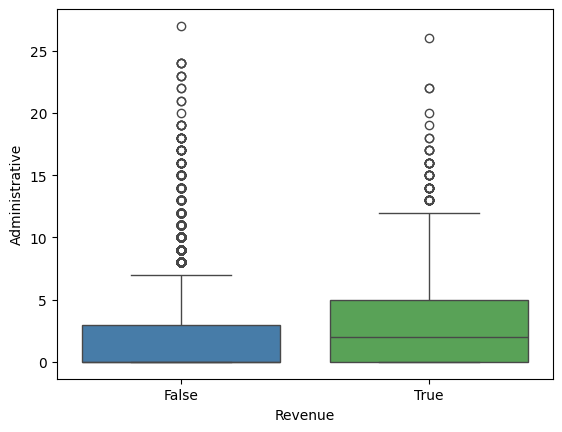

In [98]:
custom_palette = sns.color_palette("Set1", n_colors=10) # Adjust for more pleasing colors
sns.boxplot(x="Revenue", y="Administrative", data=df_data, palette=[custom_palette[1],custom_palette[2]])
plt.show()

**Administrative_Duration**

/var/folders/x6/2j5tcph963s4c7km92kjr14r0000gn/T/ipykernel_17683/971175740.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Revenue", y="Administrative_Duration", data=df_data, palette=[custom_palette[1],custom_palette[2]])


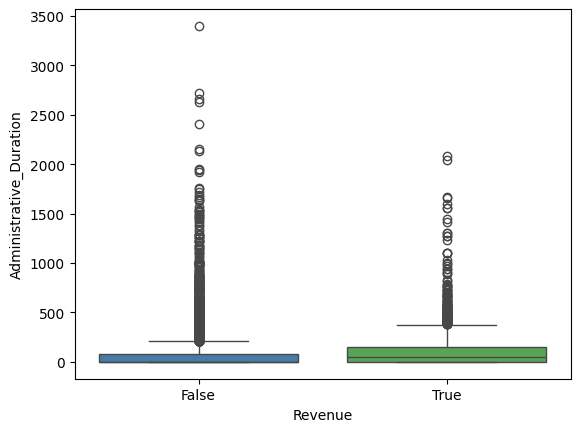

In [99]:
sns.boxplot(x="Revenue", y="Administrative_Duration", data=df_data, palette=[custom_palette[1],custom_palette[2]])
plt.show()

**Informational**

/var/folders/x6/2j5tcph963s4c7km92kjr14r0000gn/T/ipykernel_17683/3602105700.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Revenue", y="Informational", data=df_data, palette=[custom_palette[1],custom_palette[2]])


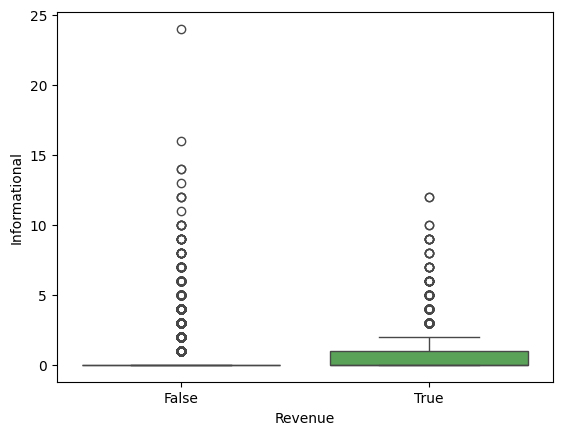

In [100]:
sns.boxplot(x="Revenue", y="Informational", data=df_data, palette=[custom_palette[1],custom_palette[2]])
plt.show()

**Informational_Duration**

/var/folders/x6/2j5tcph963s4c7km92kjr14r0000gn/T/ipykernel_17683/1190003282.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Revenue", y="Informational_Duration", data=df_data, palette=[custom_palette[1],custom_palette[2]])


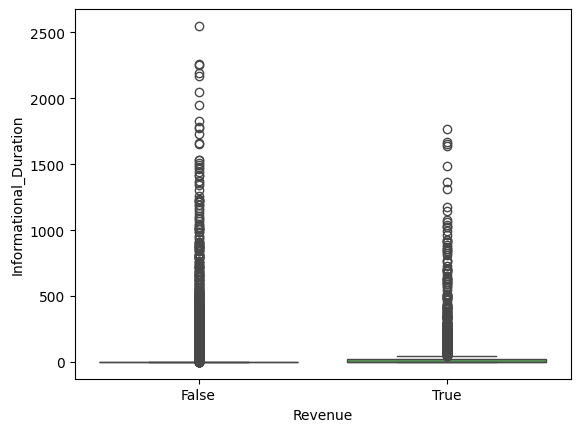

In [101]:
sns.boxplot(x="Revenue", y="Informational_Duration", data=df_data, palette=[custom_palette[1],custom_palette[2]])
plt.show()

**ProductRelated**

/var/folders/x6/2j5tcph963s4c7km92kjr14r0000gn/T/ipykernel_17683/1607274719.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Revenue", y="ProductRelated", data=df_data, palette=[custom_palette[1],custom_palette[2]])


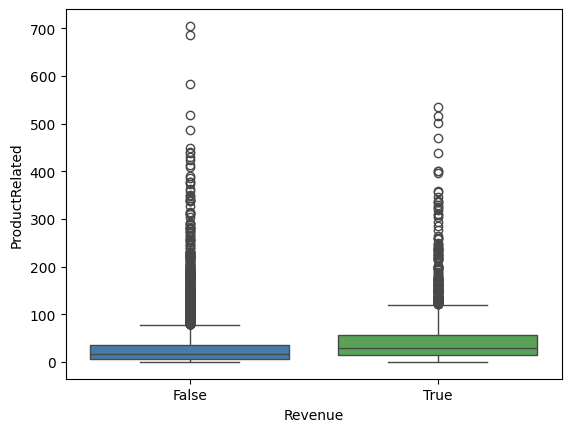

In [102]:
sns.boxplot(x="Revenue", y="ProductRelated", data=df_data, palette=[custom_palette[1],custom_palette[2]])
plt.show()

**ProductRelated_Duration**

/var/folders/x6/2j5tcph963s4c7km92kjr14r0000gn/T/ipykernel_17683/2695489500.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Revenue", y="ProductRelated_Duration", data=df_data, palette=[custom_palette[1],custom_palette[2]])


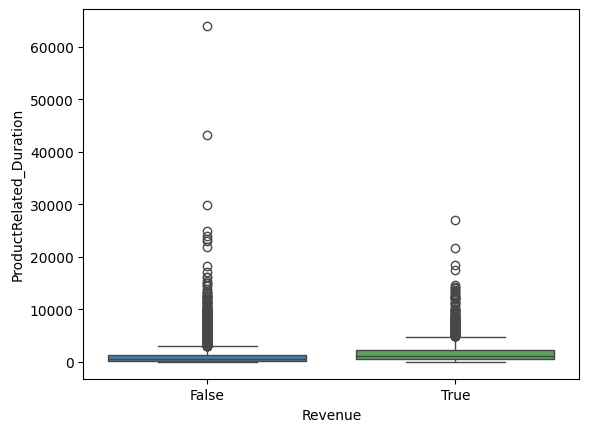

In [103]:
sns.boxplot(x="Revenue", y="ProductRelated_Duration", data=df_data, palette=[custom_palette[1],custom_palette[2]])
plt.show()

**BounceRates**

/var/folders/x6/2j5tcph963s4c7km92kjr14r0000gn/T/ipykernel_17683/826594036.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Revenue", y="BounceRates", data=df_data, palette=[custom_palette[1],custom_palette[2]])


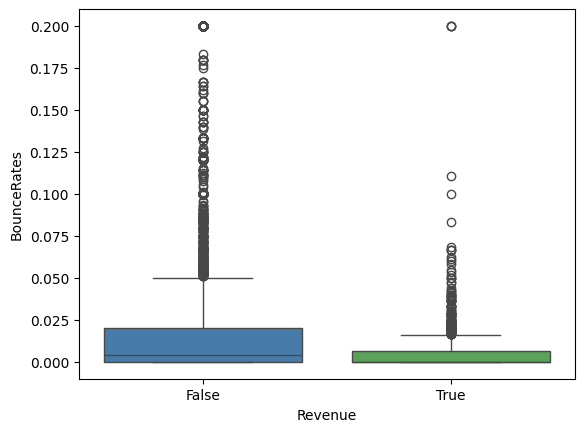

In [104]:
sns.boxplot(x="Revenue", y="BounceRates", data=df_data, palette=[custom_palette[1],custom_palette[2]])
plt.show()

**ExitRates**

/var/folders/x6/2j5tcph963s4c7km92kjr14r0000gn/T/ipykernel_17683/2403117381.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Revenue", y="ExitRates", data=df_data, palette=[custom_palette[1],custom_palette[2]])


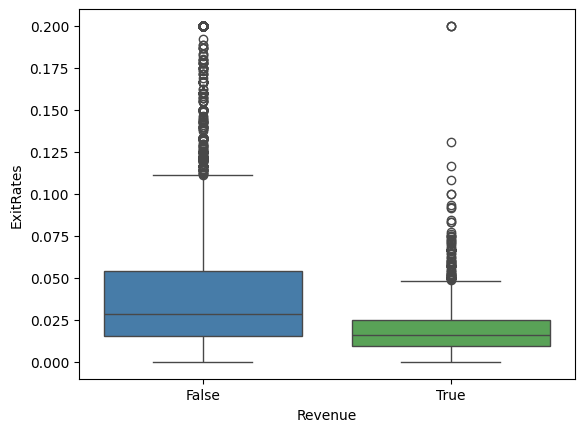

In [105]:
sns.boxplot(x="Revenue", y="ExitRates", data=df_data, palette=[custom_palette[1],custom_palette[2]])
plt.show()

**PageValues**

/var/folders/x6/2j5tcph963s4c7km92kjr14r0000gn/T/ipykernel_17683/970085070.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Revenue", y="PageValues", data=df_data, palette=[custom_palette[1],custom_palette[2]])


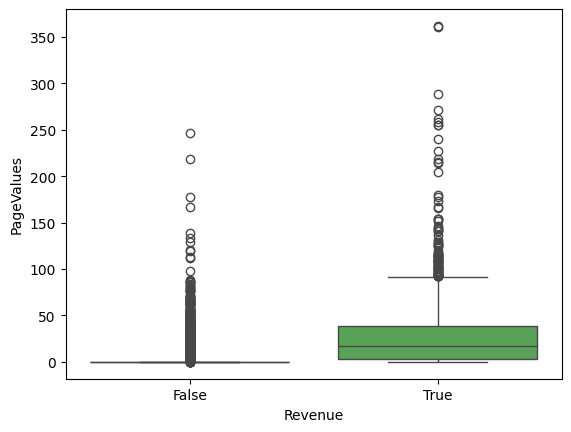

In [106]:
sns.boxplot(x="Revenue", y="PageValues", data=df_data, palette=[custom_palette[1],custom_palette[2]])
plt.show()

**SpecialDay**

/var/folders/x6/2j5tcph963s4c7km92kjr14r0000gn/T/ipykernel_17683/832682210.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Revenue", y="SpecialDay", data=df_data, palette=[custom_palette[1],custom_palette[2]])


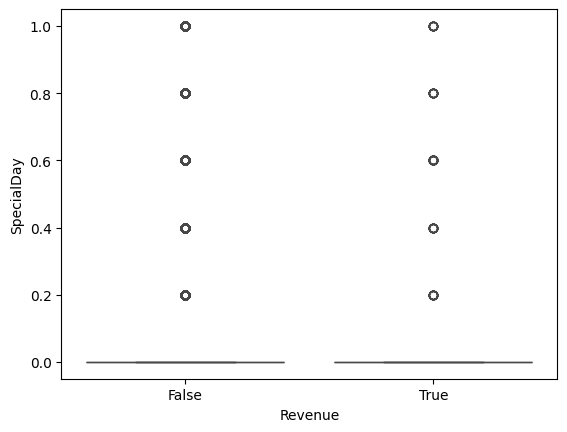

In [107]:
sns.boxplot(x="Revenue", y="SpecialDay", data=df_data, palette=[custom_palette[1],custom_palette[2]])
plt.show()

**OperatingSystems**

/var/folders/x6/2j5tcph963s4c7km92kjr14r0000gn/T/ipykernel_17683/1788255955.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Revenue", y="OperatingSystems", data=df_data, palette=[custom_palette[1],custom_palette[2]])


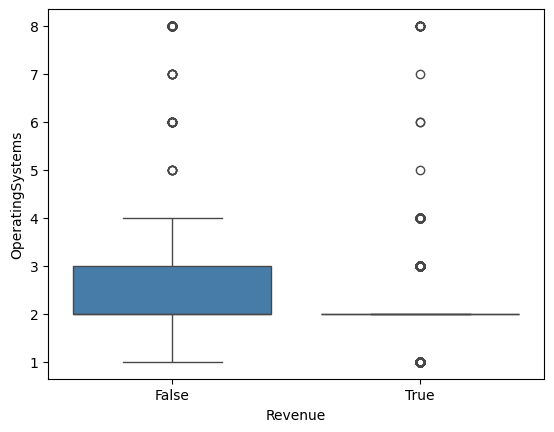

In [108]:
sns.boxplot(x="Revenue", y="OperatingSystems", data=df_data, palette=[custom_palette[1],custom_palette[2]])
plt.show()

**Browser**

/var/folders/x6/2j5tcph963s4c7km92kjr14r0000gn/T/ipykernel_17683/1874113183.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Revenue", y="Browser", data=df_data, palette=[custom_palette[1],custom_palette[2]])


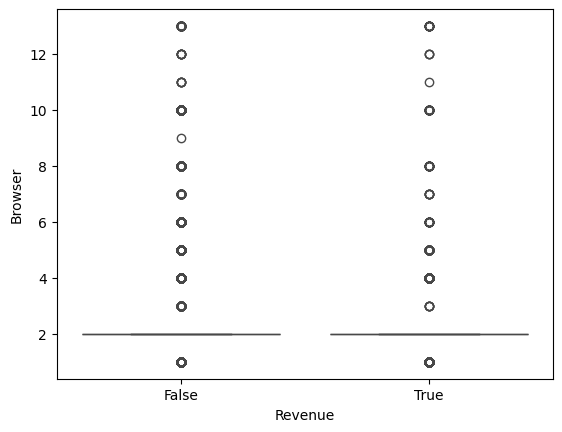

In [109]:
sns.boxplot(x="Revenue", y="Browser", data=df_data, palette=[custom_palette[1],custom_palette[2]])
plt.show()

**Region**

/var/folders/x6/2j5tcph963s4c7km92kjr14r0000gn/T/ipykernel_17683/265867733.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Revenue", y="Region", data=df_data, palette=[custom_palette[1],custom_palette[2]])


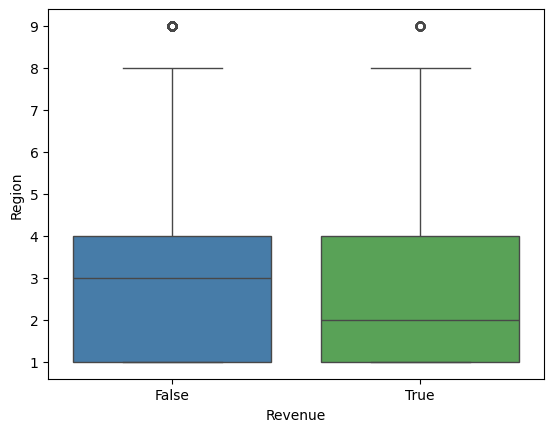

In [110]:
sns.boxplot(x="Revenue", y="Region", data=df_data, palette=[custom_palette[1],custom_palette[2]])
plt.show()

**TrafficType**

/var/folders/x6/2j5tcph963s4c7km92kjr14r0000gn/T/ipykernel_17683/3130310412.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Revenue", y="TrafficType", data=df_data, palette=[custom_palette[1],custom_palette[2]])


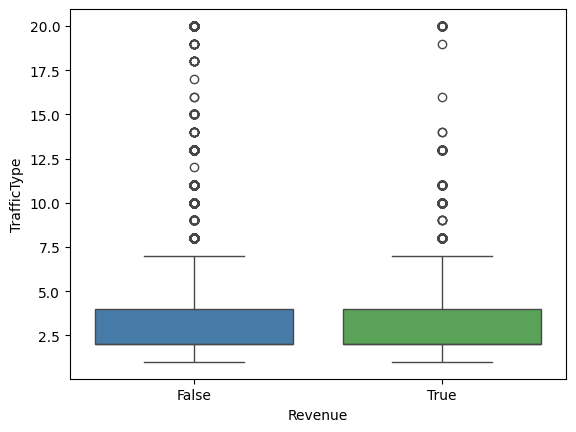

In [111]:
sns.boxplot(x="Revenue", y="TrafficType", data=df_data, palette=[custom_palette[1],custom_palette[2]])
plt.show()

### 1.3.2 Categorical Attributes

For parameters of type object, the `describe`` function returns:

- count: number of (non-null) values;
- unique: number of different categories;
- top: the most frequent category;
- freq: counts of the most frequent category;

In [112]:
# df_data.describe(include = [np.object])

df_data.describe(include=[object])

,Month,VisitorType
count,12330,12330
unique,10,3
top,May,Returning_Visitor
freq,3364,10551


The month of May represents 27% of the data. For the attribute VisitorType, more than 85% are classified as Returning_Visitor so it might not be appropriate to use this feature for the classification.

#### 1.3.2 Categorical Attributes: Graphs with Categorical attributes
Below is a series of graphs showing how the parameters of the object type affect the label (Revenue). The bar graph is used for that.

**Month**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Feb'),
  Text(1, 0, 'Mar'),
  Text(2, 0, 'May'),
  Text(3, 0, 'Oct'),
  Text(4, 0, 'June'),
  Text(5, 0, 'Jul'),
  Text(6, 0, 'Aug'),
  Text(7, 0, 'Nov'),
  Text(8, 0, 'Sep'),
  Text(9, 0, 'Dec')])

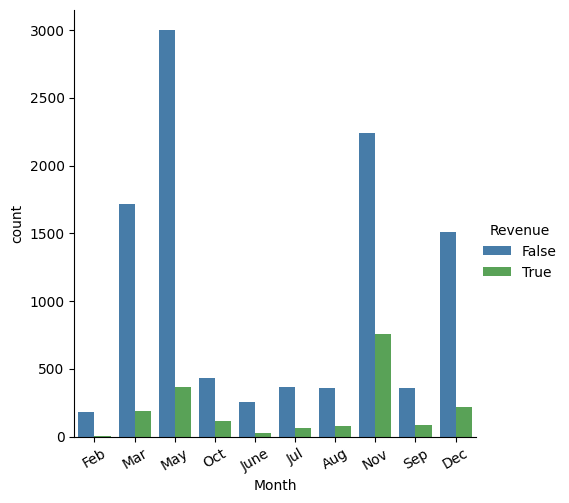

In [113]:
sns.catplot( x = "Month", hue = "Revenue", kind = "count", data = df_data, palette = [custom_palette[1],custom_palette[2]],height=5, aspect=1)
plt.xticks(rotation=30)

**VisitorType**

In [114]:
df_data["VisitorType"].value_counts()

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

So the attribute Visitor Type has three categories

([0, 1, 2],
 [Text(0, 0, 'Returning_Visitor'),
  Text(1, 0, 'New_Visitor'),
  Text(2, 0, 'Other')])

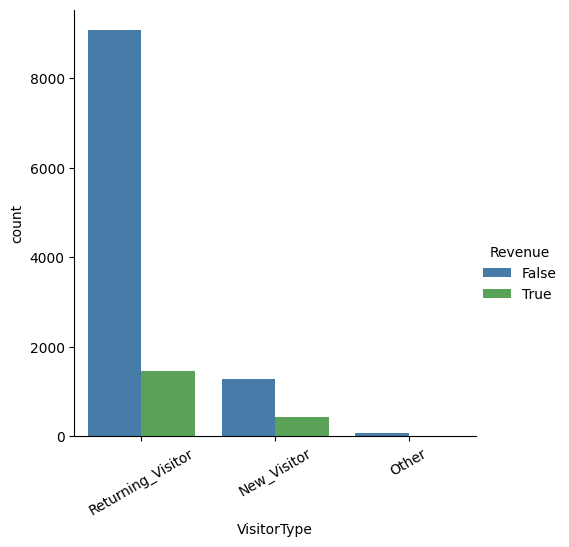

In [115]:
sns.catplot( x = "VisitorType", hue = "Revenue", kind = "count", data = df_data, palette = [custom_palette[1],custom_palette[2]],height=5, aspect=1)
plt.xticks(rotation=30)

The bar graph for the different types of visitor provides a comparison of the proportion of ethnicities in the dataset. However, it is not possible to visualize the percentage between the individuals who bought it and those who did not. Therefore, the pie chart is projected

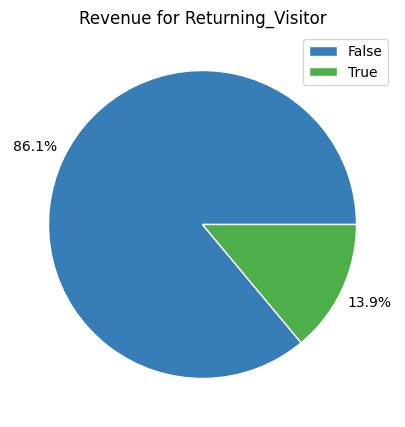

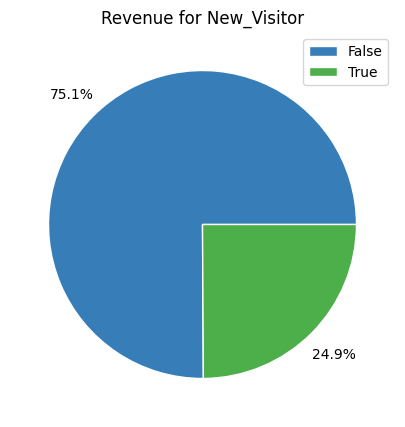

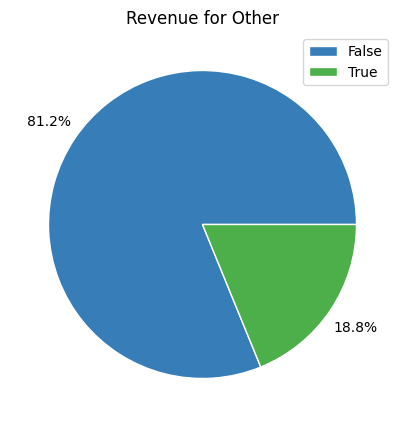

In [116]:
def sum_groups(cluster):
    k = 0
    j = 0
    for value in cluster:
        if value == False:
            k += 1
        else:
            j += 1   
    return k, j

# Returning_Visitor

first_cluster = df_data.loc[(df_data['VisitorType'] == 'Returning_Visitor')].Revenue
first_cluster.values

%matplotlib inline
colors_graph = [custom_palette[1],custom_palette[2]]
fig, ax = plt.subplots(figsize=(6,5), subplot_kw= dict(aspect='equal'))
ax.pie(sum_groups(first_cluster.values), autopct='%1.1f%%', pctdistance=1.2, colors=colors_graph, wedgeprops=dict(width=1, edgecolor='w'))
ax.set_title('Revenue for Returning_Visitor')
plt.legend(['False', 'True'])
plt.show()


# New_Visitor

second_cluster = df_data.loc[(df_data['VisitorType'] == 'New_Visitor')].Revenue
second_cluster.values

%matplotlib inline
colors_graph = [custom_palette[1],custom_palette[2]]
fig, ax = plt.subplots(figsize=(6,5), subplot_kw= dict(aspect='equal'))
ax.pie(sum_groups(second_cluster.values), autopct='%1.1f%%', pctdistance=1.2, colors=colors_graph, wedgeprops=dict(width=1, edgecolor='w'))
ax.set_title('Revenue for New_Visitor')
plt.legend(['False', 'True'])
plt.show()

# Other

third_cluster = df_data.loc[(df_data['VisitorType'] == 'Other')].Revenue
third_cluster.values

%matplotlib inline
colors_graph = [custom_palette[1],custom_palette[2]]
fig, ax = plt.subplots(figsize=(6,5), subplot_kw= dict(aspect='equal'))
ax.pie(sum_groups(third_cluster.values), autopct='%1.1f%%', pctdistance=1.2, colors=colors_graph, wedgeprops=dict(width=1, edgecolor='w'))
ax.set_title('Revenue for Other')
plt.legend(['False', 'True'])
plt.show()



### 1.3.3 Boolean Attributes

In [117]:
# df_data.describe(include = [np.bool])
df_data.describe(include=[bool])

,Weekend,Revenue
count,12330,12330
unique,2,2
top,False,False
freq,9462,10422


# 4. Data Cleaning & Preprocessing

In this work package, the purpose is to preprocess the data, and select the relervant features for developing a classification model. There are a few tasks in this work package:

*Task 1:* Cleaning. In this task, the aim is to clean the data by removing/imputating the missing values and outliers.

*Task 2:* Preprocessing. The aim of this task is to encode the categorical features and combine them with the numerical features. Also, we need to scale the numerical features.

*Task 3:* Feature selection. The aim of this task is to decide which features are relervant and needs to be used in the classification model to be developed.

## 4.1 Data Cleaning

## A - Checking for missing values

The next step is to find the missing data and decide the best way to treat them. To do that, the command `isnull().sum()` is used because it shows the number of missing values per column. 

In [120]:
df_data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

So there is **no missing data**!

## !!!Removing outliers

## B- Duplicate and Irrelevant Data

The data cleaning process begins by removing duplicate data, which can be done using the `drop_duplicates` method.

In [119]:
df_data.drop_duplicates(keep='first', inplace = True)

After that, the columns **Administrative_Duration', 'Informational', 'Informational_Duration','SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region' and 'TrafficType'** were removed as they did prove to be little relevant to the label.

In [ ]:
df_data = df_data.drop(['Administrative_Duration', 'Informational', 'Informational_Duration','SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType'], axis=1)

## 3.4 Correlation Analysis
Correlation analysis can be carried out using Pearson's correlation coefficient (Pearson's r). This coefficient defines the degree of correlation between two variables in statistics and varies between -1 and 1. In this sense, the closer it is to 0, the lower the correlation.

To establish the correlation of numerical variables, categorical variables need to be transformed into numbers. Therefore, it is necessary to make some modifications to the dataframe, which is why a copy will be made.

In [ ]:
df_data_corr = df_data.copy()

In [ ]:
# Importing the LabelEncoder
from sklearn.preprocessing import LabelEncoder

df_data_corr['Month'] = LabelEncoder().fit_transform(df_data_corr['Month']) 
df_data_corr['VisitorType'] = LabelEncoder().fit_transform(df_data_corr['VisitorType'])

In [ ]:
plt.figure(figsize=(12,12))

sns.heatmap(df_data_corr.corr().round(3), square = True, annot=True, vmin=-1, vmax=1, cmap='YlGnBu')
plt.show()

In this way, features with a low correlation coeficiente with Reveneu were eliminated. That being said, the features with the best coefficient, i.e. those that will be used for our classifier, are: 
- Administrative;
- ProductRelated;
- ProductRelated_Duration;
- BounceRates;
- ExitRates;
- PageValues;
- VisitorType;


## 4.2 Split the Data

The dat ais separated into  and Y, with Y being the desired variable (Revenue) and X being the independent variables 

In [ ]:
Y_train = df_data.pop('Revenue')
X_train = df_data

Next, X is divided into numerical, sparse  (I need to check)??? and categorical data.

In [ ]:
numerical_cols = list(X_train.select_dtypes(include=[np.number]).columns.values)

# Separate the sparse data
# numerical_cols.remove('capital.gain')
# numerical_cols.remove('capital.loss')

# sparse_cols = ['capital.gain','capital.loss']

categorical_cols = list(X_train.select_dtypes(exclude=[np.number]).columns.values)

print("Categorical columns: ", categorical_cols)
print("Numerical columns: ", numerical_cols)
# print("Sparse columns: ", sparse_cols)

## 4.3 Data Transformation into Numbers

### 4.3.1 Categorical data

Categorical data can be transformed into numbers using the commmand ``OneHotEncoder``

In [ ]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder(sparse=False) 

The scikit-learn transformer sequence is explained by the ``Pipeline``.

In [ ]:
from sklearn.pipeline import Pipeline

categorical_pipeline = Pipeline(steps = [('onehot', OneHotEncoder(drop='if_binary'))])

### 4.3.2 Numerical data

The numerical data will be normalized and, therefore, the ``StandardScaler`` method is used.

In [ ]:
from sklearn.preprocessing import RobustScaler,StandardScaler

# sparse_pipeline = Pipeline(steps = [('scaler', RobustScaler())])
numerical_pipeline = Pipeline(steps = [('scaler', StandardScaler())])

Now execute the ``ColumnTransformer`` command, which will apply the different pipelines to their respective columns.

In [ ]:
from sklearn.compose import ColumnTransformer

# Creates our Pre-Processor

# Each pipeline is associated with its respective column in the dataset
preprocessor = ColumnTransformer(transformers = [
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

X_train = preprocessor.fit_transform(X_train)

## 4.4 Training, Validation and Test Data

In order to enable the application of different classification methods, the dataset is separated into three types of data: training, validation and test data. The proportion will be 70% for training; 15% for validation and 15% for testing.

Since the label (**Revenue**) in our dataset is 90% False, it is important to distribute it proportionally in the three subsets.

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming you have features X and labels Y
X_train, X_temp, Y_train, Y_temp = train_test_split(X_train, Y_train, test_size=0.3, stratify=Y_train, random_state=42)

# Split the temporary set into validation and test sets
X_valid, X_test, Y_valid, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, stratify=Y_temp, random_state=42)

# Print the sizes of the resulting sets
print("Train set size:", len(X_train))
print("Validation set size:", len(X_valid))
print("Test set size:", len(X_test))

# Checking the proportion
print("Training set class distribution:", pd.Series(Y_train).value_counts(normalize=True))
print("Validation set class distribution:", pd.Series(Y_valid).value_counts(normalize=True))
print("Test set class distribution:", pd.Series(Y_test).value_counts(normalize=True))

# 5. Predictive Models

Once the data has been cleaned and pre-processed, we can finally apply some prediction models. We'll use four classifiers: KNN, Support Vector Classifier, Random Forest Classifier and Neural Network.

## 5.1 KNN

To use this model, we execute the KNeighborsClassifier class.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In order to estimate a good accuracy using this method, Cross-Validation is used. In this method, the data is partitioned into k divisions and the model is trained on k-1 of them, i.e. one is always left free to test performance. In this way, the process is repeated k times and, in the end, a good expected accuracy is obtained.

Some values of the k hyperparameter will be tested in order to obtain the number of neighbors that give the best result.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score

# Quantities and neighbors to be tested
neighbors = [15,20,25,30]

# Dictionary that stores the performance of each k
neighbors_scores = {}

for k in neighbors:
    # Calculates the average accuracy of each classifier
    score = cross_val_score(KNeighborsClassifier(n_neighbors=k), X_train, Y_train, cv = 5, scoring="recall").mean()

    # Save this accuracy
    neighbors_scores[k] = score

# Obtain the number of neighbors with the best performance
best_k = max(neighbors_scores, key=neighbors_scores.get)

print("Hyperparameter with best result: ", best_k)
print("Recall obtained: ", neighbors_scores[best_k])


Therefore, the number of neighbors k that gives the best result is 25. This hyperparameter is therefore used in the KNN classifier.

In [ ]:
knn = KNeighborsClassifier(n_neighbors = best_k)
knn.fit(X_train, Y_train)

## 5.2 SVM (Support Vector Machine)

The SVM is implemented using scikit-learn.

In [ ]:
from sklearn.svm import SVC

svc = SVC(random_state=42, probability=True)

With the standard hyperparameters, we have:

In [ ]:
from sklearn.model_selection import cross_val_score

recall_scorer = make_scorer(recall_score, greater_is_better=True)
score = cross_val_score(svc, X_train, Y_train, cv = 4, scoring="recall")
print("Recall with cross validation:", score.mean())

However, it is important to test other hyperparameters in order to find out which one gives the best result. In this context, Bayes Search is used, which is a hyperparameter optimization technique.

In [ ]:
# Import Bayes Search:
from skopt import BayesSearchCV

# Import the entire search space
from skopt.space import Integer, Real

# Create Bayes Search:
recall_scorer = make_scorer(recall_score, greater_is_better=True)
svc_search_cv = BayesSearchCV(estimator = svc, search_spaces = {'C': Real(1e-2, 20), 'gamma': ['scale', 'auto'],}, \
                              cv = 2, n_iter = 15, n_jobs=1, random_state=42, scoring=recall_scorer)

# Performing BayesSearch optimization:
%timeit -n 1 -r 1 svc_search_cv.fit(X_train, Y_train)

print('Best hyperparameters: {}'.format(svc_search_cv.best_params_))
print('Performance of the best model: {}'.format(round(svc_search_cv.best_score_,5)))

## 5.3 Random Forest

The scikit-learn package is used to implement the Random Forest classifier.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)

To optimize the hyperparameters, the following passage is used:

In [ ]:
from skopt import BayesSearchCV

from skopt.space import Integer, Real

# Create Bayes Search:
recall_scorer = make_scorer(recall_score, greater_is_better=True)
rfc_search_cv = BayesSearchCV(estimator = rfc,
                              search_spaces = {'n_estimators': Integer(100, 500),
                                               'criterion': ['gini', 'entropy'],
                                               'max_depth': Integer(1, 50),},
                              cv = 5,
                              n_iter = 20, n_jobs=1, random_state=42,  scoring=recall_scorer)

# Performing BayesSearch optimization:
%timeit -n 1 -r 1 rfc_search_cv.fit(X_train, Y_train)

print('Best hyperparameters: {}'.format(rfc_search_cv.best_params_))
print('Performance of the best model: {}'.format(round(rfc_search_cv.best_score_,5)))

## 5.4 Neural Network

The last method to be applied is neural networks. To do this, it instantiates the MLPClassifier class of scikit-learn:

In [ ]:
from sklearn.neural_network import MLPClassifier

# Instance our classifier
mlp = MLPClassifier(random_state=42, early_stopping=True)

Next, the neural network's hyperparameters are optimized

In [ ]:
from scipy.stats import loguniform as sp_loguniform
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameters to be optimized
hyperparams = {'hidden_layer_sizes': [(2 ** i, 2 ** j) for j in np.arange(5, 8) for i in np.arange(4, 7)],
               'alpha': sp_loguniform(1e-10, 1e-1),
               'learning_rate': ['constant','adaptive']}

# Search for Hyperparameters
mlp_search_cv = RandomizedSearchCV(mlp, hyperparams, scoring='recall', n_iter=25, cv=3, n_jobs=1, random_state=42)
%timeit -n 1 -r 1 mlp_search_cv.fit(X_train, Y_train)

print('Best hyperparameters: {}'.format(mlp_search_cv.best_params_))
print('Performance of the best model: {}'.format(round(mlp_search_cv.best_score_,5)))

# 6. Compararing Classifiers

Now, you can compare the different classification methods and see which has achieved the best result. To do this, you use the stipulated accuracy and AUC values.

To calculate the AUC, the classes are transformed into integers and LabelEncorer is used.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

The values for the different methods are:

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

knn_roc_auc = roc_auc_score(le.fit_transform(Y_valid), knn.predict_proba(X_valid)[:,1])
knn_acc = accuracy_score(Y_valid, knn.predict(X_valid))
knn_recall = recall_score(Y_valid, knn.predict(X_valid))
print("K-Nearest Neighbors:")
print('AUC -------- KNN: {:.4f}'.format(knn_roc_auc))
print('Accuracy --- KNN: {:.4f}'.format(knn_acc))
print('Recall --- KNN: {:.4f}'.format(knn_recall))
print('')

svc_roc_auc = roc_auc_score(le.fit_transform(Y_valid), svc_search_cv.predict_proba(X_valid)[:,1])
svc_acc = accuracy_score(Y_valid, svc_search_cv.predict(X_valid))
svc_recall = recall_score(Y_valid, svc_search_cv.predict(X_valid))
print("Support Vector Classifier:")
print('AUC -------- SVC: {:.4f}'.format(svc_roc_auc))
print('Accuracy --- SVC: {:.4f}'.format(svc_acc))
print('Recall --- SVC: {:.4f}'.format(svc_recall))
print('')

rfc_roc_auc = roc_auc_score(le.fit_transform(Y_valid), rfc_search_cv.predict_proba(X_valid)[:,1])
rfc_acc = accuracy_score(Y_valid, rfc_search_cv.predict(X_valid))
rfc_recall = recall_score(Y_valid, rfc_search_cv.predict(X_valid))
print("Random Forest:")
print('AUC -------- Random Forest: {:.4f}'.format(rfc_roc_auc))
print('Accuracy --- Random Forest: {:.4f}'.format(rfc_acc))
print('Recall --- Random Forest: {:.4f}'.format(rfc_recall))
print('')

mlp_roc_auc = roc_auc_score(le.fit_transform(Y_valid), mlp_search_cv.predict_proba(X_valid)[:,1])
mlp_acc = accuracy_score(Y_valid, mlp_search_cv.predict(X_valid))
mlp_recall = recall_score(Y_valid, mlp_search_cv.predict(X_valid))
print('Neural Network:')
print('AUC -------- Neural Network: {:.4f}'.format(mlp_roc_auc))
print('Accuracy --- Neural Network: {:.4f}'.format(mlp_acc))
print('Recall --- Neural Network: {:.4f}'.format(mlp_recall))

BEFORE IT WAS TRUE BUT NOW WE NEED TO CHOOSE (Thus, it can be seen that Neural Network achieved the best results for both AUX and Accuracy. So this method will be adopted to predict the test data).

# 7. Evaluating Chosen Classifier

Once the classifier has been chosen, it will now be trained using the validation data as well. In this way, we merge the test and validation data. 

Finally, the test data can now be predicted.



In [ ]:
from sklearn.metrics import classification_report

# Step 1: Merge Training and Validation Data
X_train_merged = np.concatenate([X_train, X_valid], axis=0)
Y_train_merged = np.concatenate([Y_train, Y_valid], axis=0)

# Step 2: Train your Classifier on Merged Data
classifier = mlp_search_cv.fit(X_train_merged, Y_train_merged)

# Step 3: Evaluate on Test Data
predictions_test = classifier.predict(X_test)

auc = roc_auc_score(le.fit_transform(Y_test), classifier.predict_proba(X_test)[:,1])
accuracy = accuracy_score(Y_test, classifier.predict(X_test))
recall = recall_score(Y_test, classifier.predict(X_test))
print('Neural Network:')
print('AUC -------- on Test Data: {:.4f}'.format(auc))
print('Accuracy -------- on Test Data: {:.4f}'.format(accuracy))
print('Recall -------- on Test Data: {:.4f}'.format(recall))

In [ ]:
print("Classification Report on Test Data:")
print(classification_report(Y_test, predictions_test))